In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm

In [3]:
def read_all_csv_files(directory_path, features, limit=1000000):
    # Initialize an empty list to store dataframes from CSV files
    dataframes = []

    # Get a list of all files in the directory
    file_list = os.listdir(directory_path)

    # Loop through each file and check if it's a CSV file
    for file_name in file_list:
        if file_name.endswith('.csv'):
            # Get the full file path
            file_path = os.path.join(directory_path, file_name)
            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(file_path)
            # Remove leading and trailing spaces from column names
            df.columns = df.columns.str.strip()
            # Append the DataFrame to the list
            dataframes.append(df[features])

    # Merge all DataFrames into a single DataFrame
    merged_df = pd.concat(dataframes, ignore_index=True)
    print("Initial Row: {}".format(merged_df.shape[0]))
    
    #applying limit if row_count > limit
    if len(merged_df) > limit:
        print("As Row Exceeds {0}, we are taking upto {1} rows".format(limit, limit))
        merged_df = merged_df.sample(limit, random_state=42)
    
    return merged_df


In [4]:
#Data Sources
PATH = './dataset'
clients = {
    'client_1': f"{PATH}/client_1_dataset.csv",
    'client_2': f"{PATH}/client_2_dataset.csv",
    'client_3': f"{PATH}/client_3_dataset.csv",
    'client_4': f"{PATH}/client_4_dataset.csv"
}

In [5]:
#Tick Names and Numbers
tick_list = list(clients.keys())
tick_numbers = list(range(1, len(tick_list)+1))
print("Tick Lists: {}".format(tick_list))
print("Tick Numbers: {}".format(tick_numbers))

Tick Lists: ['client_1', 'client_2', 'client_3', 'client_4']
Tick Numbers: [1, 2, 3, 4]


In [20]:
for key, element in tqdm(clients.items(), total=len(clients)):
    dataframe = pd.read_csv(element)
    locals()[key] = dataframe
    print(f"---------------------{key}----------------------------------")
    print(dataframe.groupby(['Label']).size().reset_index(name="Count"))
    print("------------------------------------------------------------------")



 25%|███████████▎                                 | 1/4 [00:02<00:08,  2.79s/it]

---------------------client_1----------------------------------
   Label   Count
0      0  202821
1      1  217179
------------------------------------------------------------------


 50%|██████████████████████▌                      | 2/4 [00:05<00:05,  2.74s/it]

---------------------client_2----------------------------------
   Label   Count
0      0  185943
1      1  234056
------------------------------------------------------------------


 75%|█████████████████████████████████▊           | 3/4 [00:08<00:02,  2.74s/it]

---------------------client_3----------------------------------
   Label   Count
0      0  210000
1      1  210000
------------------------------------------------------------------


100%|█████████████████████████████████████████████| 4/4 [00:10<00:00,  2.75s/it]

---------------------client_4----------------------------------
   Label   Count
0      0  210000
1      1  210000
------------------------------------------------------------------


In [22]:
def draw_box_plot(data, tick_numbers, tick_list, title, x_label="", y_label="", show_outliers=False):
    fig, ax = plt.subplots(figsize=(6,4))
    plt.suptitle(title)
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, showfliers=show_outliers, patch_artist=True)
    plt.xticks(tick_numbers, tick_list)
    plt.xticks(rotation=90)
    ax.set_ylabel(y_label)
    plt.show()

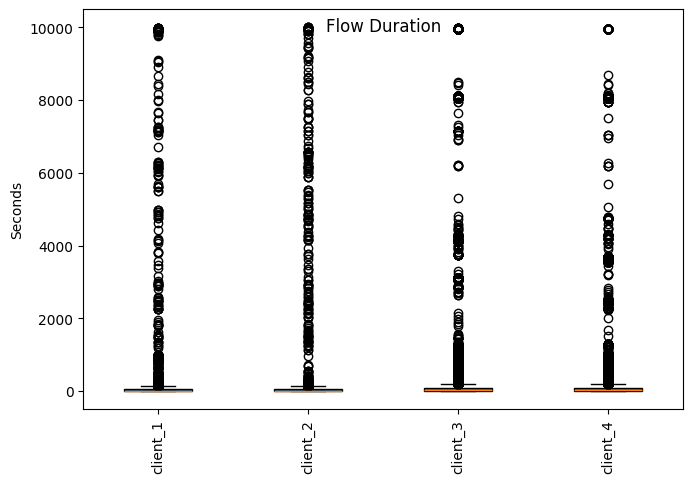

In [23]:
##Flow Duration
data = []
for key, element in clients.items():
    data.append(locals()[key]['Flow Duration']/1000000)

draw_box_plot(data, tick_numbers, tick_list, 'Flow Duration', '', 'Seconds', True)

#draw_box_plot(data, tick_numbers, tick_list, 'Flow Duration', '', 'Seconds', False)


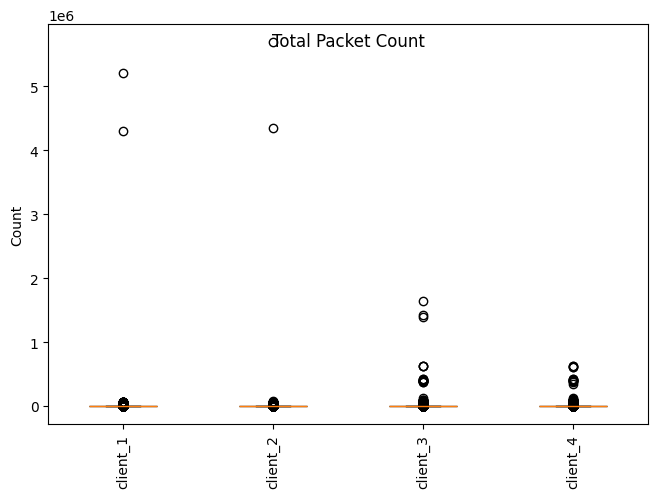

In [25]:
##Total  Packets
data = []
for key, element in clients.items():
    data.append(locals()[key]['Total Bwd packets'] + locals()[key]['Total Fwd Packet'])

draw_box_plot(data, tick_numbers, tick_list, 'Total Packet Count', '', 'Count', True)
#draw_box_plot(data, tick_numbers, tick_list, 'Total Packet Count', '', 'Count', False)    

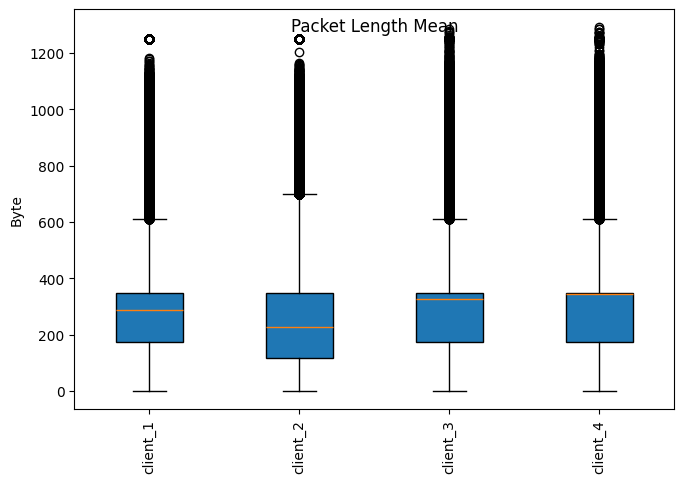

In [26]:
##Total Lenght of Packets Packets
data = []
for key, element in clients.items():
    data.append(locals()[key]['Packet Length Mean'])

draw_box_plot(data, tick_numbers, tick_list, 'Packet Length Mean', '', 'Byte', True)
#draw_box_plot(data, tick_numbers, tick_list, 'Packet Length Mean', '', 'Byte', False)


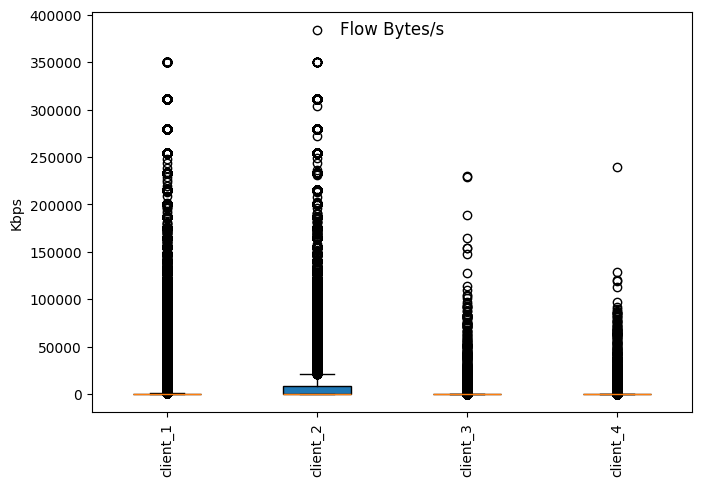

In [27]:
##TFlow Bytes/s (kbps)
data = []
for key, element in clients.items():
    data.append(locals()[key]['Flow Bytes/s']*8/1000) #making it kbps from Byte/s

draw_box_plot(data, tick_numbers, tick_list, 'Flow Bytes/s', '', 'Kbps', True)
#draw_box_plot(data, tick_numbers, tick_list, 'Flow Bytes/s', '', 'Kbps', False)


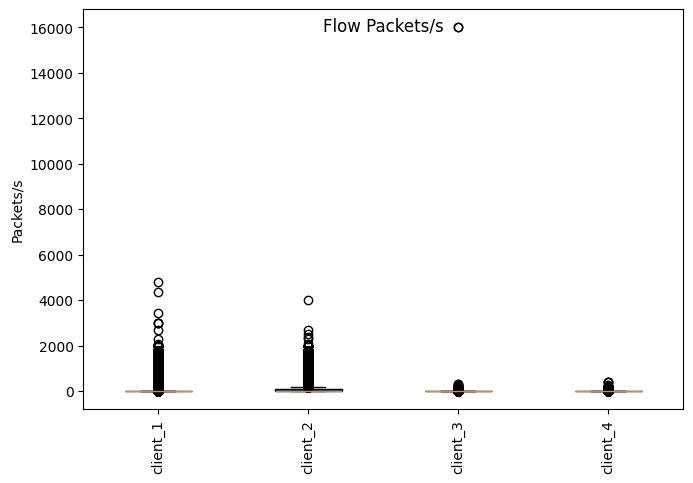

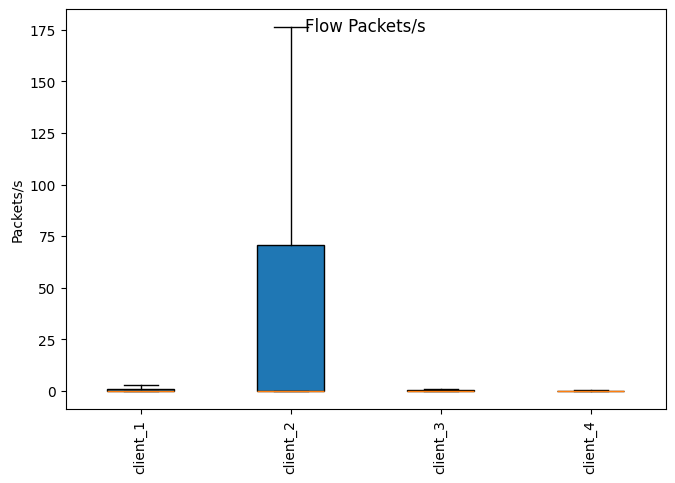

In [28]:
##TFlow Bytes/s (kbps)
data = []
for key, element in clients.items():
    data.append(locals()[key]['Flow Packets/s']*8/1000) #making it kbps from Byte/s

draw_box_plot(data, tick_numbers, tick_list, 'Flow Packets/s', '', 'Packets/s', True)
draw_box_plot(data, tick_numbers, tick_list, 'Flow Packets/s', '', 'Packets/s', False)

## Fwd PSH flags: Number of times the PSH flag was set in packets travelling in the forward direction (0 for UDP)

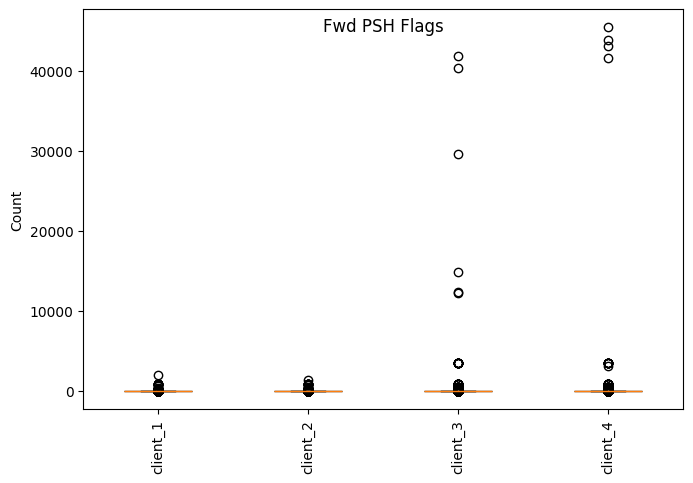

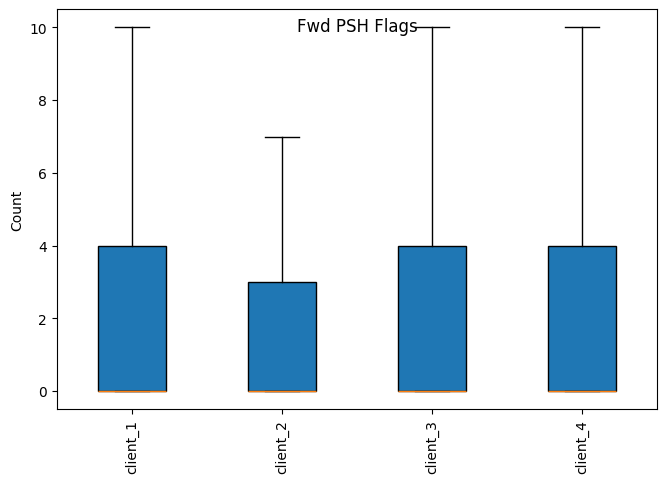

In [31]:

data = []
for key, element in clients.items():
    data.append(locals()[key]['Fwd PSH Flags']) #making it kbps from Byte/s

draw_box_plot(data, tick_numbers, tick_list, 'Fwd PSH Flags', '', 'Count', True)
draw_box_plot(data, tick_numbers, tick_list, 'Fwd PSH Flags', '', 'Count', False)

## Fwd Act Data Pkts: Count of packets with at least 1 byte of TCP data payload in the forward direction

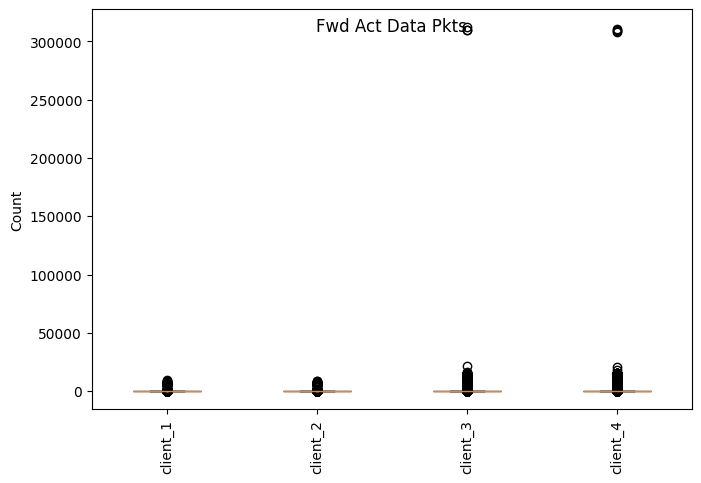

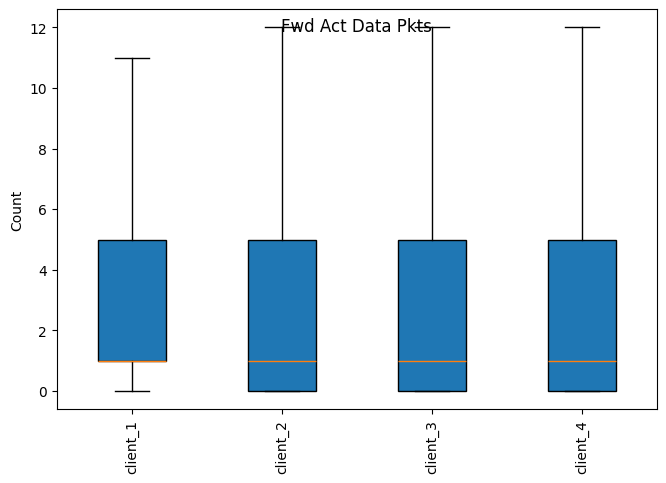

In [32]:
data = []
for key, element in clients.items():
    data.append(locals()[key]['Fwd Act Data Pkts']) #making it kbps from Byte/s

draw_box_plot(data, tick_numbers, tick_list, 'Fwd Act Data Pkts', '', 'Count', True)
draw_box_plot(data, tick_numbers, tick_list, 'Fwd Act Data Pkts', '', 'Count', False)